In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv(r'C:\Users\akash\Desktop\diabetes.csv', sep =',')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
X = df.iloc[:, 0:8]
y = df[['Outcome']]

In [25]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [26]:
y.head(1)

,Outcome
0,1


In [27]:
sc = StandardScaler()
X1 = sc.fit_transform(X)

In [28]:
X1

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X1,y, test_size=0.3, random_state=0)

In [30]:
len(xtrain)

537

In [31]:
len(xtest)

231

In [32]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

In [33]:
knn_G=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn_G,params,cv=5)
GS.fit(X1,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
GS.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [35]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [36]:
RF=RandomForestClassifier(random_state=0)
param={'n_estimators':np.arange(1,100),'criterion':['entropy','gini']}
GS=GridSearchCV(RF,param,cv=5)
GS.fit(X1,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
GS.best_params_

{'criterion': 'gini', 'n_estimators': 17}

In [39]:
model1=DecisionTreeClassifier(random_state=0)
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [41]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}
GS=GridSearchCV(model1,parameter,cv=3)
GS.fit(X1,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform')
Dt_model=DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=0)
#Dt_model2=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
RF = RandomForestClassifier(n_estimators=20, criterion='gini')
LR_bag = BaggingClassifier(base_estimator = LR, n_estimators = 7, random_state = 0)
NB_bag = BaggingClassifier(base_estimator = NB, n_estimators = 16, random_state = 0)
KNN_bag = BaggingClassifier(base_estimator = KNN, n_estimators = 10, random_state = 0)
LR_ab = AdaBoostClassifier(base_estimator = LR, n_estimators = 150, random_state = 0)
NB_ab = AdaBoostClassifier(base_estimator = NB, n_estimators = 140, random_state = 0)
DT_ab = AdaBoostClassifier(n_estimators = 4, random_state = 0)
RF_ab = AdaBoostClassifier(base_estimator = RF, n_estimators = 80)
#DT_bag = BaggingClassifier(n_estimators = 6, random_state = 0)
Grad_boost = GradientBoostingClassifier(n_estimators = 203, random_state = 0)

In [107]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
for model, name in zip([LR, NB, KNN, Dt_model, RF, LR_bag, NB_bag, KNN_bag, LR_ab, NB_ab, DT_ab, RF_ab, DT_bag, Grad_boost], ['LR', 'NB', 'KNN', 'DT', 'RF', 'LR_bag', 'NB_bag', 'KNN_bag', 'LR_ab','NB_ab', 'DT_ab', 'RF_ab', 'DT_bag', 'GradBoost']):
    roc_auc = []
    for train, test in kf.split(X1, y):
        xtrain, xtest = X1[train, :], X1[test,:]
        ytrain, ytest = y.iloc[train], y.iloc[test]
        model.fit(xtrain, ytrain)
        Y_predict = model.predict(xtest)
        fpr, tpr, _ = roc_curve(ytest, Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print("AUC SCORE : %0.02F(+/- %0.5F)[%s]"%(np.mean(roc_auc)*100,np.var(roc_auc,ddof=1),name))

AUC SCORE : 72.92(+/- 0.00054)[LR]
AUC SCORE : 71.27(+/- 0.00237)[NB]
AUC SCORE : 68.82(+/- 0.00144)[KNN]
AUC SCORE : 72.46(+/- 0.00219)[DT]
AUC SCORE : 70.81(+/- 0.00060)[RF]
AUC SCORE : 72.57(+/- 0.00016)[LR_bag]
AUC SCORE : 71.11(+/- 0.00245)[NB_bag]
AUC SCORE : 69.16(+/- 0.00137)[KNN_bag]
AUC SCORE : 72.14(+/- 0.00059)[LR_ab]
AUC SCORE : 56.36(+/- 0.00381)[NB_ab]
AUC SCORE : 67.46(+/- 0.00077)[DT_ab]
AUC SCORE : 71.36(+/- 0.00189)[RF_ab]
AUC SCORE : 68.46(+/- 0.00084)[DT_bag]
AUC SCORE : 72.59(+/- 0.00219)[GradBoost]


In [108]:
models = []
models.append(('Logistic', LR))
models.append(('Naive Baye', NB))
models.append(('KNN', KNN))
models.append(('Decision Tree', Dt_model))
models.append(('Random Forest', RF))
models.append(('Bagged_LR', LR_bag))
models.append(('Bagged_NB', NB_bag))
models.append(('Boosted_DT', DT_ab))
models.append(('Boosted_RF', RF_ab))
models.append(('Grad_Boost', Grad_boost))
models.append(('Bagged_Logistic', LR_bag))
models.append(('Naive Bayes bagged', NB_bag))
models.append(('KNN bagged', KNN_bag))

Logistic: 0.575403 (0.001447)
Naive Baye: 0.601509 (0.003556)
KNN: 0.483322 (0.007552)
Decision Tree: 0.647672 (0.005292)
Random Forest: 0.556030 (0.005492)
Bagged_LR: 0.595997 (0.002488)
Bagged_NB: 0.612887 (0.004460)
Boosted_DT: 0.538632 (0.007510)
Boosted_RF: 0.583770 (0.004416)
Grad_Boost: 0.631789 (0.005058)
Bagged_Logistic: 0.595997 (0.002488)
Naive Bayes bagged: 0.612887 (0.004460)
KNN bagged: 0.515570 (0.006370)


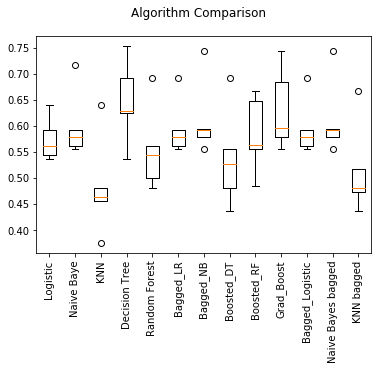

In [109]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X1, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 90)
plt.show()